In [16]:
import pandas as pd
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate confusion matrix for the most confused classes
from sklearn.metrics import confusion_matrix
import numpy as np

In [33]:
# read the json file
df = pd.read_json("../dataset/wos/llm_graph_gpt3_l2.json")
df.head(3)

,Y1,Y2,Y,Domain,area,keywords,Abstract,gpt3_graph_l1,gpt3_graph_l2
0,0,12,12,CS,Symbolic computation,(2+1)-dimensional non-linear optical waves; e...,(2 + 1)-dimensional non-linear optical waves t...,cs,symboliccomputation
1,5,2,74,Medical,Alzheimer's Disease,Aging; Tau; Amyloid; PET; Alzheimer's disease...,(beta-amyloid (A beta) and tau pathology becom...,Medical,alzheimersdisease
2,4,7,68,Civil,Green Building,LED lighting system; PV system; Distributed l...,(D)ecreasing of energy consumption and environ...,ece,solarenergy


In [34]:
df["Domain"] = df["Domain"].str.lower()
df["Domain"] = df["Domain"].str.replace("*", "").str.replace("'", "").str.replace('"', '').str.replace(' ', '')
df["gpt3_graph_l1"] = df["gpt3_graph_l1"].str.lower()
df["gpt3_graph_l1"] = df["gpt3_graph_l1"].str.replace("*", "").str.replace("'", "").str.replace('"', '').str.replace(' ', '')
df["gpt3_graph_l1"] = df["gpt3_graph_l1"].fillna(df["Domain"].sample(len(df), random_state=42))
f1_l1 = f1_score(df["gpt3_graph_l1"], df["Domain"], average="macro")
f1_l1

0.7555003843024239

              precision    recall  f1-score  support
mae            0.655793  0.652411  0.654098   3297.0
biochemistry   0.646097  0.708810  0.676002   5687.0
psychology     0.784139  0.701904  0.740746   7142.0
civil          0.758128  0.814491  0.785300   4237.0
medical        0.767816  0.839111  0.801882  14625.0
ece            0.847267  0.768922  0.806196   5483.0
cs             0.894822  0.764047  0.824280   6514.0


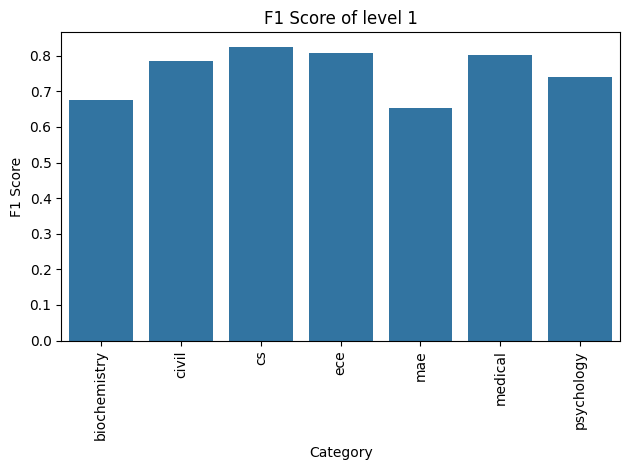

In [35]:
report = classification_report(df["Domain"], df["gpt3_graph_l1"], output_dict=True)

# Convert to DataFrame for easier manipulation
report_df = pd.DataFrame(report).transpose()
report_df = report_df.drop(['accuracy', 'macro avg', 'weighted avg'])

# Display the report
print(report_df.sort_values(by='f1-score'))

# Plot F1 scores by class
plt.figure()
sns.barplot(x=report_df.index, y=report_df['f1-score'])
plt.xticks(rotation=90)
plt.title('F1 Score of level 1')
plt.xlabel('Category')
plt.ylabel('F1 Score')
plt.tight_layout()
plt.savefig('level1_f1_scores.pdf')
plt.show()

In [37]:
df["area"] = df["area"].str.lower()
df["area"] = df["area"].str.replace("*", "").str.replace("'", "").str.replace('"', '').str.replace(' ', '')
df["gpt3_graph_l2"] = df["gpt3_graph_l2"].str.lower()
df["gpt3_graph_l2"] = df["gpt3_graph_l2"].str.replace("*", "").str.replace("'", "").str.replace('"', '').str.replace(' ', '')
# df["gpt3_graph_l2"] = df["gpt3_graph_l2"].fillna(df["area"].sample(len(df)))
df["gpt3_graph_l2"] = df["gpt3_graph_l2"].apply(lambda x: x if x in df["area"].values else df["area"].sample(1, random_state=42).values[0])
f1_l1 = f1_score(df["gpt3_graph_l2"], df["area"], average="macro")
f1_l1

0.629841829442157

                      precision    recall  f1-score  support
childabuse             0.000000  0.000000  0.000000    404.0
outdoorhealth          0.010870  0.500000  0.021277      2.0
underwaterwindmill     0.020833  1.000000  0.040816      1.0
dna/rnasequencing      0.040323  0.714286  0.076336     14.0
attention              0.162011  0.069712  0.097479    416.0
...                         ...       ...       ...      ...
signal-flowgraph       0.967871  0.879562  0.921606    274.0
overactivebladder      0.936364  0.908824  0.922388    340.0
hereditaryangioedema   0.981818  0.890110  0.933718    182.0
rainwaterharvesting    0.958430  0.941043  0.949657    441.0
geotextile             0.982801  0.954654  0.968523    419.0

[143 rows x 4 columns]


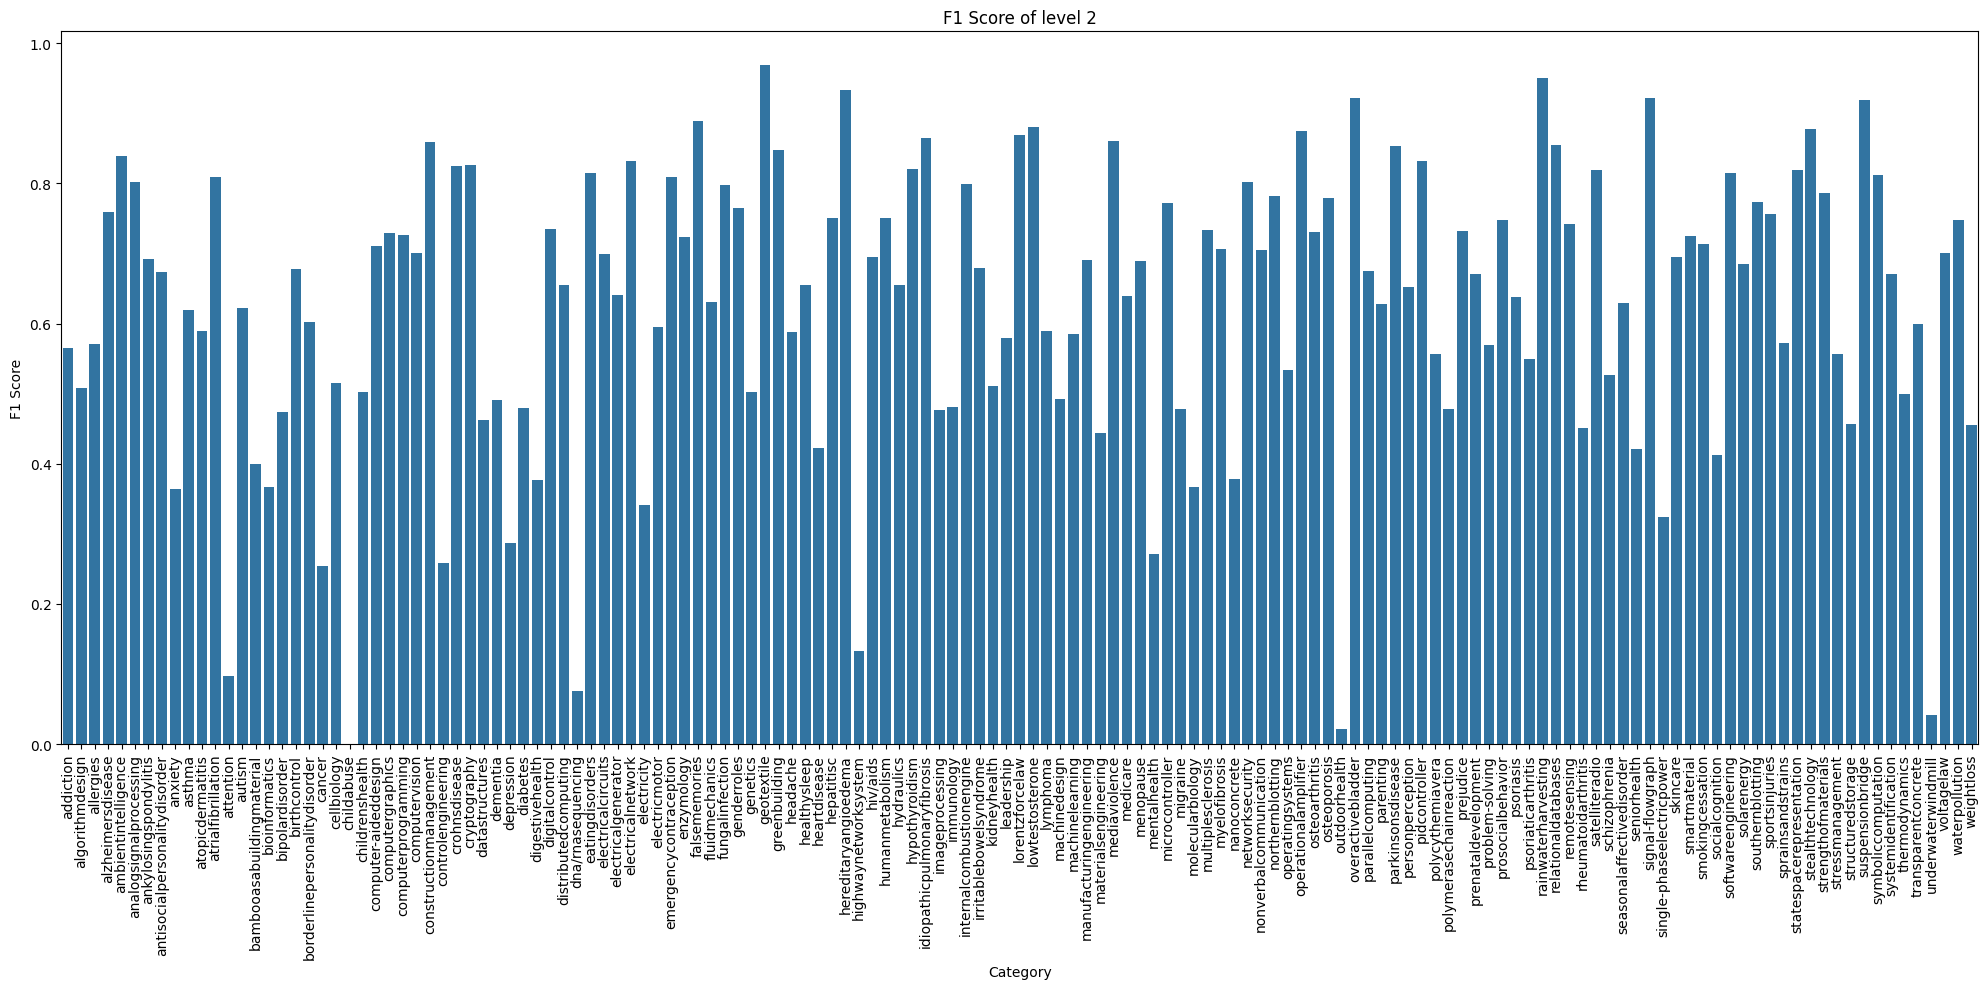

In [38]:
report = classification_report(df["area"], df["gpt3_graph_l2"], output_dict=True, zero_division=0)

# Convert to DataFrame for easier manipulation
report_df = pd.DataFrame(report).transpose()
report_df = report_df.drop(['accuracy', 'macro avg', 'weighted avg'])

# Display the report
print(report_df.sort_values(by='f1-score'))

# Plot F1 scores by class
plt.figure(figsize=(20, 10))
sns.barplot(x=report_df.index, y=report_df['f1-score'])
plt.xticks(rotation=90)
plt.title('F1 Score of level 2')
plt.xlabel('Category')
plt.ylabel('F1 Score')
plt.tight_layout()
plt.savefig('level2_f1_scores.pdf')  # Fixed filename to level2 instead of level1
plt.show()